This notebook demonstrates the voxel corner and center difference with the old and new `NiBabel` API to read `trackvis` files.

We begin downloading the tractogram file.



In [10]:
import os
import requests
from pathlib import Path

output_path = Path(os.getcwd())

url = "https://osf.io/vj2gw/download/"
resp = requests.get(url, allow_redirects=True, stream=True)
sft_fname = output_path / "tractogram_probabilistic_sf.trk"
with open(sft_fname, "wb") as f:
    for chunk in resp.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)

Read the tractogram with the old and new `NiBabel` APIs.

In [11]:
import nibabel as nib

# Read with old API
tracts_and_data, header = nib.trackvis.read(sft_fname, points_space="rasmm")
tracts, _, _ = list(zip(*tracts_and_data))
strml_old_api = nib.streamlines.ArraySequence(tracts)

# Read with new API
trk_file = nib.streamlines.load(sft_fname)
strml_new_api = trk_file.streamlines

/tmp/ipykernel_1166647/3825779543.py:4: DeprecationWarning: trackvis.read is deprecated; please use nibabel.streamlines.load, instead.

* deprecated from version: 2.5.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0.0
  tracts_and_data, header = nib.trackvis.read(sft_fname, points_space="rasmm")


Plot the result and save it.

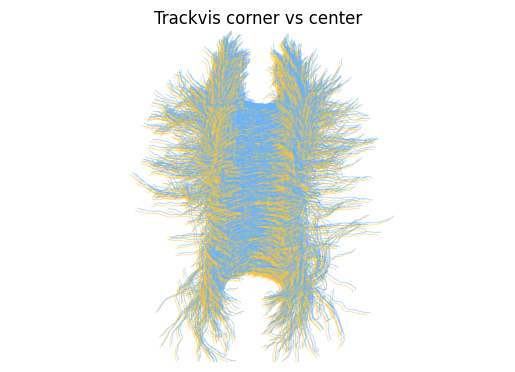

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from fury import actor, window

background = window.colors.white
size = (1080, 720)
linewidth = 0.1

cmap_strml1 = mcolors.hex2color("#66b2ff")
cmap_strml2 = mcolors.hex2color("#ffc437")

stream_actor1 = actor.line(strml_old_api, colors=cmap_strml1, linewidth=linewidth)
stream_actor2 = actor.line(strml_new_api, colors=cmap_strml2, linewidth=linewidth)

scene = window.Scene()
scene.background(background)

scene.add(stream_actor1)
scene.add(stream_actor2)

scene.reset_camera_tight(margin_factor=1.0)
# window.show(scene, size=size, reset_camera=False)
arr = window.snapshot(scene, size=size, offscreen=True)

plt.imshow(arr)
plt.axis('off')
plt.title('Trackvis corner vs center')
plt.show()

screenshot_fname = output_path / "tractogram_probabilistic_sf_trackvis_corner_center.png"
snapshot = window.snapshot(scene, fname=screenshot_fname, size=size)